In [3]:
import numpy as np
from collections import defaultdict


class QLearningAgent():
    """QLearning智能体"""
    def __init__(self, state_size, action_size):
        self.state_dim = state_size  # 状态空间维度（例如网格世界的 (height, width)）
        self.action_dim = action_size  # 动作空间大小
        
        # 超参数
        self.alpha = 0.1   # 学习率
        self.gamma = 0.9    # 折扣因子
        
        # 探索参数
        self.epsilon = 0.9  # 初始探索率
        
        # 用 defaultdict 初始化 Q-table（默认值为 0）
        self.q_table = defaultdict(lambda: np.zeros(action_size))
    
    def get_action(self, state):
        """ε-贪婪策略选择动作"""
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_dim)  # 随机探索
        else:
            return np.argmax(self.q_table[state])  # 选择最优动作
    
    def update(self, state, action, reward, next_state, done):
        """Q-learning 更新规则"""
        current_q = self.q_table[state][action]
        
        # 计算目标 Q 值
        if done:
            target_q = reward
        else:
            target_q = reward + self.gamma * np.max(self.q_table[next_state])
        
        # 更新 Q-table
        self.q_table[state][action] += self.alpha * (target_q - current_q)
        

In [4]:
# 导入自定义的网格世界环境
import os, sys
# 添加当前目录的上级目录到系统路径
if "commom_expand" not in sys.path:
    sys.path.append(os.path.join(os.getcwd(), "common_expand"))

from common_expand.gridworld import GridWorld


# 创建环境和智能体
env = GridWorld()
agent = QLearningAgent(state_size=env.shape, action_size=len(env.action_space))

# 训练参数
episodes = 2000  # 训练轮数
log_interval = 100  # 打印日志的间隔


training_data_file = "Q_Learning_training_data.csv"
rewards_history = []  # 用于存储每个回合的总奖励
epsilons_history = []  # 用于存储每个回合的 epsilon 值
steps_history = [] # 用于存储完成每回合的步数

# 训练循环
for episode in range(1, episodes + 1):
    state = env.reset()
    done = False
    total_reward = 0
    step_count = 0
    
    while not done:
        # 选择动作并执行
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)
        
        # 更新 Q-table
        agent.update(state, action, reward, next_state, done)
        
        state = next_state
        total_reward += reward
        step_count += 1

    # 记录
    rewards_history.append(total_reward)
    epsilons_history.append(agent.epsilon)
    steps_history.append(step_count)

    # 保存训练数据
    if not os.path.exists(training_data_file):
        with open(training_data_file, "w") as f:
            f.write("episode,total_reward,step_count,epsilon\n")

    with open(training_data_file, "a") as f:
        f.write(f"{episode},{total_reward},{step_count},{agent.epsilon}\n")


    # 定期打印训练进度
    if episode % log_interval == 0:
        print(f"Episode: {episode}, Total Reward: {total_reward:.2f}, Epsilon: {agent.epsilon}")


Episode: 100, Total Reward: -1.00, Epsilon: 0.9
Episode: 200, Total Reward: 2.00, Epsilon: 0.9
Episode: 300, Total Reward: 2.00, Epsilon: 0.9
Episode: 400, Total Reward: 2.00, Epsilon: 0.9
Episode: 500, Total Reward: 2.00, Epsilon: 0.9
Episode: 600, Total Reward: 2.00, Epsilon: 0.9
Episode: 700, Total Reward: 2.00, Epsilon: 0.9
Episode: 800, Total Reward: 2.00, Epsilon: 0.9
Episode: 900, Total Reward: 2.00, Epsilon: 0.9
Episode: 1000, Total Reward: 2.00, Epsilon: 0.9
Episode: 1100, Total Reward: 2.00, Epsilon: 0.9
Episode: 1200, Total Reward: 2.00, Epsilon: 0.9
Episode: 1300, Total Reward: 2.00, Epsilon: 0.9
Episode: 1400, Total Reward: 2.00, Epsilon: 0.9
Episode: 1500, Total Reward: 2.00, Epsilon: 0.9
Episode: 1600, Total Reward: 2.00, Epsilon: 0.9
Episode: 1700, Total Reward: 2.00, Epsilon: 0.9
Episode: 1800, Total Reward: 2.00, Epsilon: 0.9
Episode: 1900, Total Reward: 0.00, Epsilon: 0.9
Episode: 2000, Total Reward: 2.00, Epsilon: 0.9


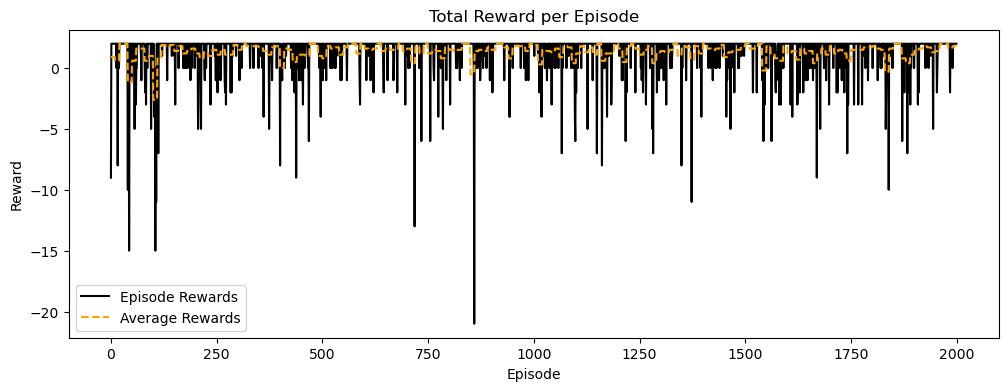

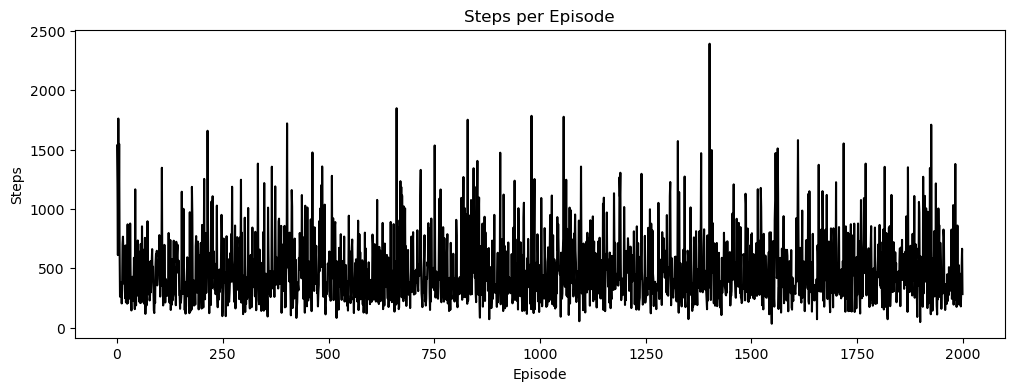

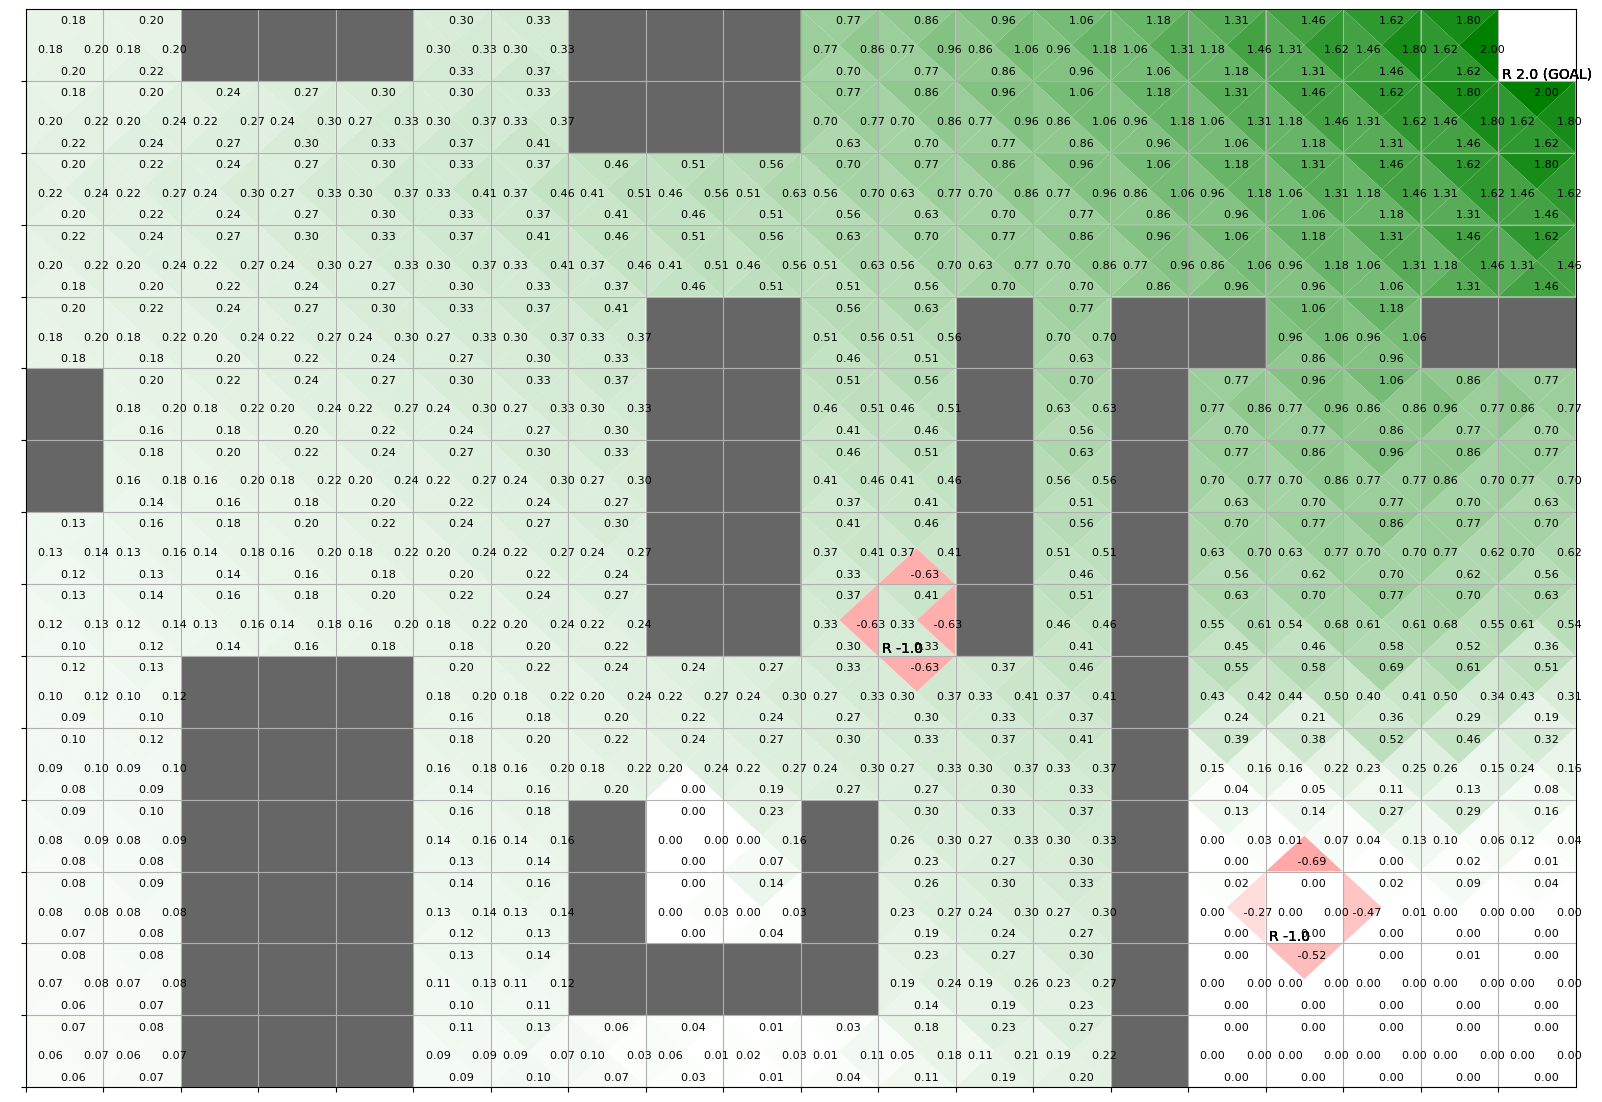

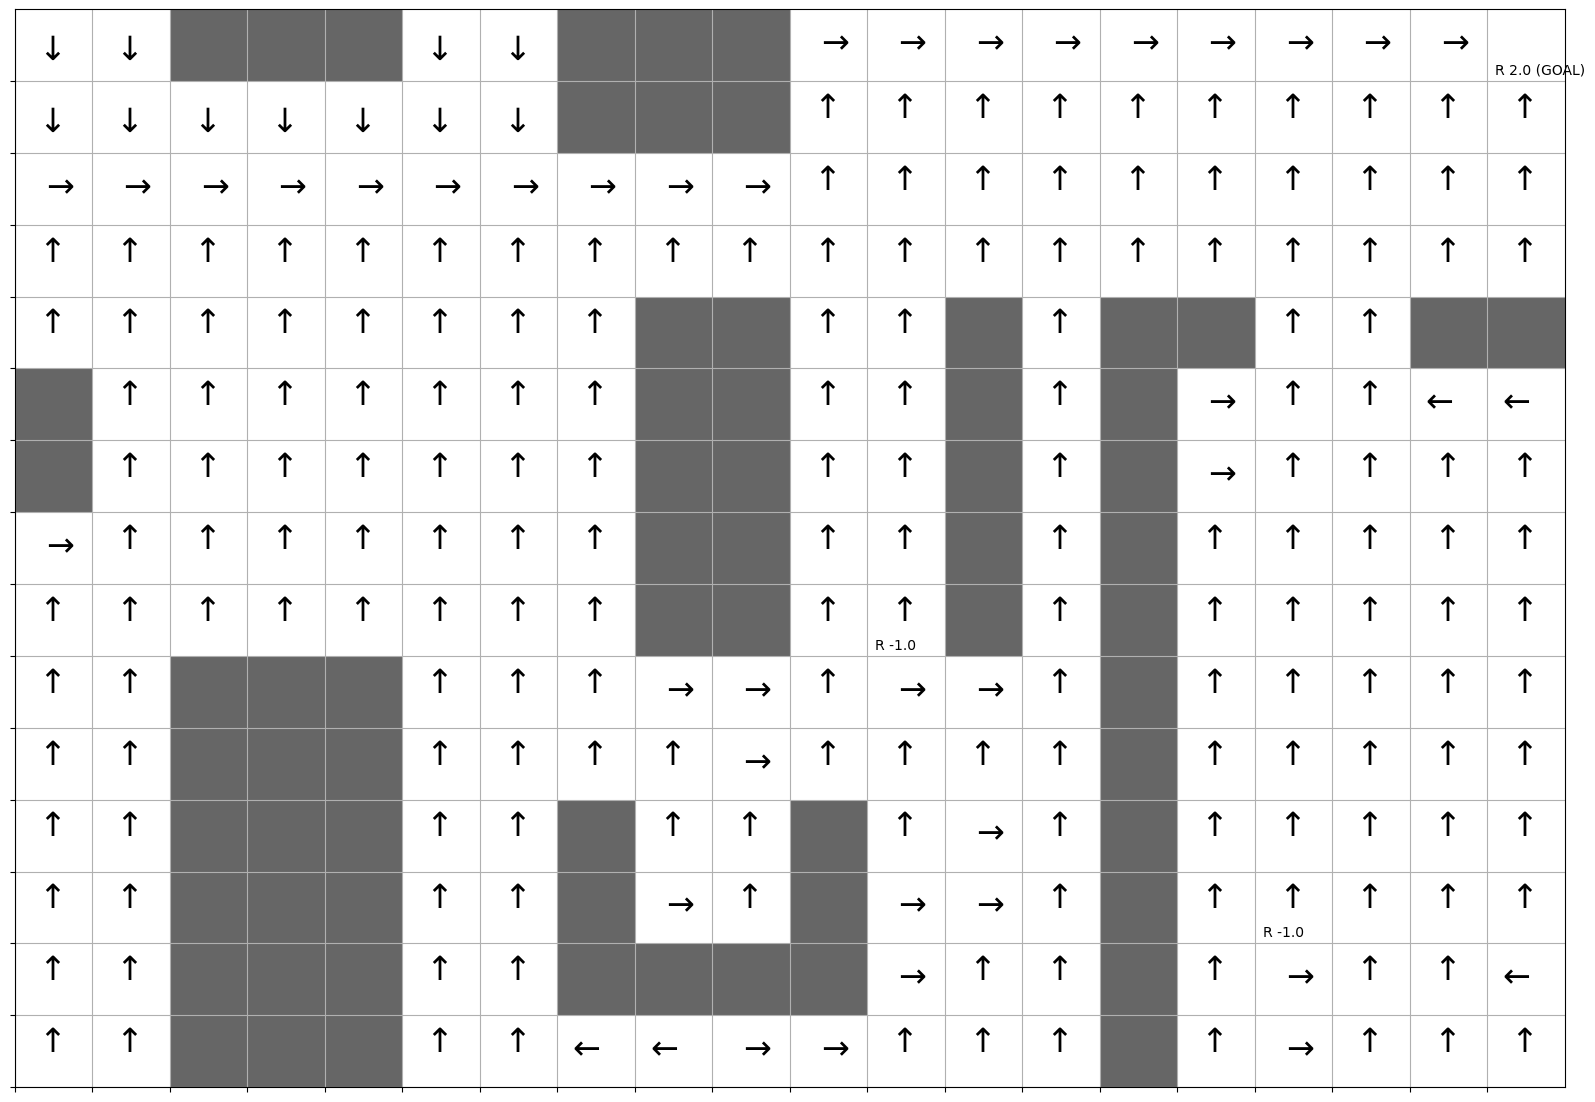

输出最优策略:
State: (0, 0), Best Action: 1
State: (0, 1), Best Action: 1
State: (0, 2), Best Action: 0
State: (0, 3), Best Action: 0
State: (0, 4), Best Action: 0
State: (0, 5), Best Action: 1
State: (0, 6), Best Action: 1
State: (0, 7), Best Action: 0
State: (0, 8), Best Action: 0
State: (0, 9), Best Action: 0
State: (0, 10), Best Action: 3
State: (0, 11), Best Action: 3
State: (0, 12), Best Action: 3
State: (0, 13), Best Action: 3
State: (0, 14), Best Action: 3
State: (0, 15), Best Action: 3
State: (0, 16), Best Action: 3
State: (0, 17), Best Action: 3
State: (0, 18), Best Action: 3
State: (0, 19), Best Action: 0
State: (1, 0), Best Action: 1
State: (1, 1), Best Action: 1
State: (1, 2), Best Action: 1
State: (1, 3), Best Action: 1
State: (1, 4), Best Action: 1
State: (1, 5), Best Action: 1
State: (1, 6), Best Action: 1
State: (1, 7), Best Action: 0
State: (1, 8), Best Action: 0
State: (1, 9), Best Action: 0
State: (1, 10), Best Action: 0
State: (1, 11), Best Action: 0
State: (1, 12), Best

In [5]:
# 可视化训练过程
import matplotlib.pyplot as plt

# 奖励曲线
fig = plt.figure(figsize=(12, 4))
plt.title("Total Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")

# 平滑处理奖励曲线, 缩小十倍
# 处理 rewards_history，打印每十个的平均值
chunk_size = 10
average_rewards = []
for i in range(0, len(rewards_history), chunk_size):
    chunk = rewards_history[i:i + chunk_size]
    average_rewards.append(sum(chunk) / len(chunk))
    # print(f"从第 {i} 到第 {i + 9} 个奖励的平均值: {average_reward}")
plt.plot(rewards_history, color="black", label="Episode Rewards")

# 由于 average_rewards 是每十个数据取平均值，为了将其尺度放大到与 rewards_history 一样
# 我们需要将每个平均值复制十次
expanded_average_rewards = []
for avg in average_rewards:
    expanded_average_rewards.extend([avg] * chunk_size)
# 确保扩展后的列表长度与 rewards_history 一致，如果 rewards_history 长度不是 chunk_size 的整数倍，需要截取多余部分
expanded_average_rewards = expanded_average_rewards[:len(rewards_history)]
plt.plot(expanded_average_rewards, color="orange", linestyle="--", label="Average Rewards")

# plt.plot(average_rewards, color="orange", label="Average Rewards")

plt.legend()
plt.show()

# 每回合的步数
fig = plt.figure(figsize=(12, 4))
plt.title("Steps per Episode")
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.plot(steps_history, color="black")
plt.show()

# 将 Q-table 转换为 {(state, action): q_value} 的格式
q_for_render = {
    (state, action): agent.q_table[state][action]
    for state in env.states()
    for action in env.action_space
}

# 现在可以正确渲染
env.render_q(q_for_render)

print("输出最优策略:")
for state in env.states():
    best_action = np.argmax(agent.q_table[state])
    print(f"State: {state}, Best Action: {best_action}")

In [6]:
import numpy as np

# 测试函数
def test_policy_success_rate(env, agent, num_episodes=1000):
    steps_count = list()
    max_steps = 300
    success_count = 0
    for _ in range(num_episodes):
        state = env.reset()
        done = False
        step_count = 0
        while not done and step_count < max_steps:
            action = np.argmax(agent.q_table[state])
            state, reward, done = env.step(action)
            step_count += 1
            # 假设奖励大于 0 表示成功
            if reward > 0:
                success_count += 1
                steps_count.append(step_count)
                break

    avg_step = np.mean(steps_count)
    success_rate = success_count / num_episodes

    return success_rate, avg_step

succ_rate, avg_step = test_policy_success_rate(env, agent)
print("成功率:", succ_rate, "平均完成步数: ", avg_step)


成功率: 1.0 平均完成步数:  33.0
